# Desafío 3

## Modelado para Mushrooms

---
<b><a id='section_1_'>1.1. Descripción del dataset Hongos</a></b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
data_location = "../Data/Hongos/mushrooms.csv"
data = pd.read_csv(data_location, sep=",")
print(data.shape)


(8124, 23)


In [3]:
data_describe = pd.DataFrame(round(data.isnull().sum() /data.shape[0],2), columns= ['Porcentaje de nulos'])
data_describe['type'] = data.dtypes
data_describe = data_describe[['type','Porcentaje de nulos']]
data_describe['Nulos'] = data.isnull().sum()
values= []
example=[]
for x in data:
    values.append(len(data[x].unique()))
    example.append(data[x].unique())
data_describe['Valores distintos'] = values
data_describe['Ejemplos'] = example


data_describe

,type,Porcentaje de nulos,Nulos,Valores distintos,Ejemplos
class,object,0.0,0,2,"[p, e]"
cap-shape,object,0.0,0,6,"[x, b, s, f, k, c]"
cap-surface,object,0.0,0,4,"[s, y, f, g]"
cap-color,object,0.0,0,10,"[n, y, w, g, e, p, b, u, c, r]"
bruises,object,0.0,0,2,"[t, f]"
odor,object,0.0,0,9,"[p, a, l, n, f, c, y, s, m]"
gill-attachment,object,0.0,0,2,"[f, a]"
gill-spacing,object,0.0,0,2,"[c, w]"
gill-size,object,0.0,0,2,"[n, b]"
gill-color,object,0.0,0,12,"[k, n, g, p, w, h, u, e, b, r, y, o]"


In [4]:
# Analizamos la proporción entre clases Target
data['class'].value_counts(normalize=True).round(2)

e    0.52
p    0.48
Name: class, dtype: float64

---
<b><a id='section_1_'>1.2. Transformación de variables Categoricas</a></b>

In [5]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [6]:
#class NewLabelEncoder(LabelEncoder):
 #   def fit(self, X, y=None):
  #      return super(NewLabelEncoder, self).fit(X)
   # def transform(self, X, y=None):
    #    return super(NewLabelEncoder, self).transform(X)
    #def fit_transform(self, X, y=None):
     #   return super(NewLabelEncoder, self).fit(X).transform(X)

In [7]:
#columnas = data.columns
#columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), columnas)])

In [8]:
#data.shape

In [9]:
#resultado = columnTransformer.fit_transform(data)
#resultado

In [10]:
#pd.DataFrame(resultado)

### Probando LabelEncoder

In [11]:
le = LabelEncoder()

In [12]:
data_encoded = data.apply(le.fit_transform)
data_encoded.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3


### Separación de features, target y sets de entrenamiento y testeo

In [13]:
X = data_encoded.drop(['class'], axis=1)
y = data_encoded['class']
print(type(X))
print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


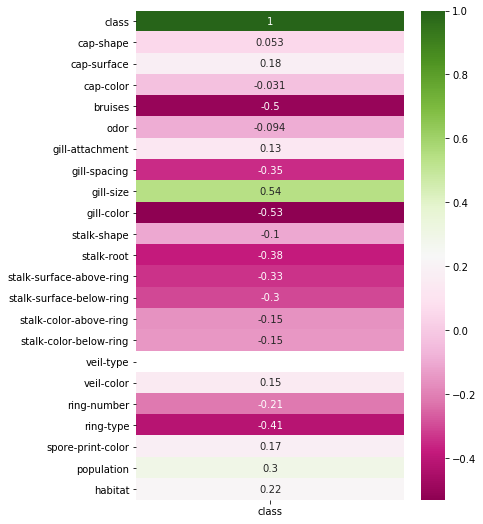

In [14]:
plt.figure(figsize=(6,9))
sns.heatmap(data_encoded.corr()[['class']], cmap="PiYG", annot=True)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)

In [16]:
display(y_train.value_counts(normalize=True).round(2))
display(y_test.value_counts(normalize=True).round(2))

0    0.52
1    0.48
Name: class, dtype: float64

0    0.52
1    0.48
Name: class, dtype: float64

### GridSearchCV con KNN y LogisticRegression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import normalize

In [18]:
lr = LogisticRegression()
knn = KNeighborsClassifier()

In [19]:
k_range = list(range(1, 30))
C = [1,10,100,1000]
solver = ['saga']
penalty = ['l1','l2', 'elasticnet']
weight_options = ['uniform', 'distance']
#class_weight = ['balanced']


In [20]:
param_grid_lr = dict(C=C, solver=solver, penalty=penalty)
print(param_grid_lr)

{'C': [1, 10, 100, 1000], 'solver': ['saga'], 'penalty': ['l1', 'l2', 'elasticnet']}


In [21]:
param_grid_knn = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid_knn)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], 'weights': ['uniform', 'distance']}


Evaluamos la mejor configuración de hiperparámetros de cada modelo: **LogReg** y **KNN**

In [22]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [23]:
grid_lr = GridSearchCV(lr, param_grid_lr, cv=folds, scoring='accuracy')
grid_lr.fit(X_train, y_train)
grid_knn = GridSearchCV(knn, param_grid_knn, cv=folds, scoring='accuracy')
grid_knn.fit(X_train, y_train)

/Users/horaciosuarez/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/horaciosuarez/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/horaciosuarez/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/horaciosuarez/opt/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/h

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [24]:
print("Logistic Regression:")
print(grid_lr.best_estimator_)
print(grid_lr.best_score_)
print(grid_lr.best_params_)
print("######################")
print("KNN:")
print(grid_knn.best_estimator_)
print(grid_knn.best_score_)
print(grid_knn.best_params_)

Logistic Regression:
LogisticRegression(C=10, penalty='l1', solver='saga')
0.947480416700315
{'C': 10, 'penalty': 'l1', 'solver': 'saga'}
######################
KNN:
KNeighborsClassifier(n_neighbors=2, weights='distance')
0.9998360655737706
{'n_neighbors': 2, 'weights': 'distance'}


In [25]:
y_pred_grid_lr = grid_lr.predict(X_test)
y_pred_grid_knn = grid_knn.predict(X_test)

In [26]:
print (classification_report(y_test, y_pred_grid_lr))
print (classification_report(y_test, y_pred_grid_knn))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1052
           1       0.96      0.94      0.95       979

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1052
           1       1.00      1.00      1.00       979

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



[[1017   35]
 [  54  925]]
[[1051    1]
 [   1  978]]


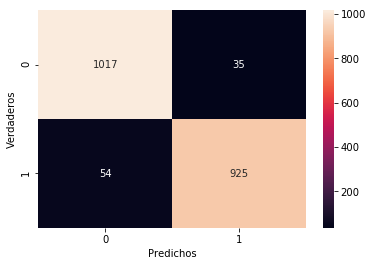

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
confusion_lr = confusion_matrix(y_test, y_pred_grid_lr)
print(confusion_lr)
confusion_knn = confusion_matrix(y_test, y_pred_grid_knn)
print(confusion_knn)
sns.heatmap(confusion_lr, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

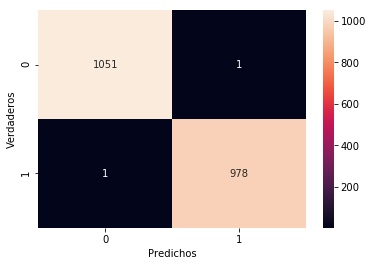

In [28]:
sns.heatmap(confusion_knn, annot=True, fmt='.0f')
plt.ylabel('Verdaderos')
plt.xlabel('Predichos');

In [29]:
y_pred_lr_proba = grid_lr.predict_proba(X_test)
y_pred_lr_proba_df = pd.DataFrame(y_pred_lr_proba)
y_pred_lr_proba_df

,0,1
0,0.102959,8.970409e-01
1,0.061676,9.383241e-01
2,0.114217,8.857835e-01
3,0.933393,6.660683e-02
4,0.000467,9.995328e-01
...,...,...
2026,0.025917,9.740833e-01
2027,0.951982,4.801766e-02
2028,1.000000,4.747068e-08
2029,0.982353,1.764669e-02


### Test sobre los threshold

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    Y_test_pred = y_pred_lr_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = accuracy_score(y_test.to_numpy().reshape(y_test.to_numpy().size,1), Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.to_numpy().reshape(y_test.to_numpy().size,1),Y_test_pred.iloc[:,1].to_numpy().reshape(Y_test_pred.iloc[:,1].to_numpy().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.7784342688330872
[[604 448]
 [  2 977]]

******** For i = 0.1 ******
Our testing accuracy is 0.8759231905465288
[[807 245]
 [  7 972]]

******** For i = 0.15 ******
Our testing accuracy is 0.9236829148202855
[[909 143]
 [ 12 967]]

******** For i = 0.2 ******
Our testing accuracy is 0.9404234367306745
[[948 104]
 [ 17 962]]

******** For i = 0.25 ******
Our testing accuracy is 0.9522402757262433
[[976  76]
 [ 21 958]]

******** For i = 0.3 ******
Our testing accuracy is 0.9596258000984736
[[994  58]
 [ 24 955]]

******** For i = 0.35 ******
Our testing accuracy is 0.9611029049729197
[[1005   47]
 [  32  947]]

******** For i = 0.4 ******
Our testing accuracy is 0.9606105366814377
[[1011   41]
 [  39  940]]

******** For i = 0.45 ******
Our testing accuracy is 0.9581486952240276
[[1014   38]
 [  47  932]]

******** For i = 0.5 ******
Our testing accuracy is 0.9561792220580995
[[1017   35]
 [  54  925]]

******** For i = 0.55 ******

In [31]:
# Specificity
TP = confusion_lr[1, 1]
TN = confusion_lr[0, 0]
FP = confusion_lr[0, 1]
FN = confusion_lr[1, 0]

speci = TN/(TN+FP)
speci

0.9667300380228137

### Curva ROC

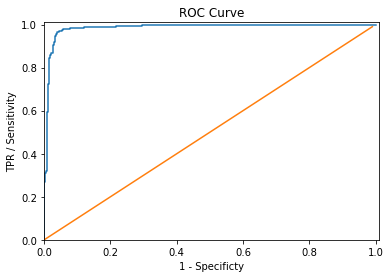

In [32]:
from sklearn.metrics import roc_curve
fpr_lr,tpr_lr,thr_lr = roc_curve(y_test, y_pred_lr_proba[:,1])

df = pd.DataFrame(dict(fpr=fpr_lr, tpr=tpr_lr, thr = thr_lr))

plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

In [33]:
from sklearn.metrics import auc
print('AUC=', auc(fpr_lr, tpr_lr))

AUC= 0.9850151664032126


In [34]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_lr_proba[:,1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

NameError: name 'metrics' is not defined